# IBM HR Analytics

## Frame the Problem and look at the big picture

### Dataset

- **Dataset Name**: IBM HR Analytics Employee Attrition & Performance
- **Source**: [Kaggle](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset/data)
- **Description**: This dataset is a fictional set created by IBM data scientists to understand the factors contributing to employee attrition and performance. It includes various attributes related to employees' personal and professional aspects.

### Features

| Hierarchy_Level                  | Education Levels | Environment Satisfaction | Job Involvement | Job Satisfaction | Performance Rating | Relationship Satisfaction | Work-Life Balance |
|--------------------------|------------------|---------------------------|-----------------|------------------|--------------------|----------------------------|-------------------|
| 1                  | Below College    | Low                       | Low             | Low              | Low                | Low                        | Bad               |
| 2                  | College          | Medium                    | Medium          | Medium           | Good               | Medium                     | Good              |
| 3                  | Bachelor         | High                      | High            | High             | Excellent          | High                       | Better            |
| 4                  | Master           | Very High                 | Very High       | Very High        | Outstanding        | Very High                  | Best              |
| 5                  | Doctor           | -                         | -               | -                | -                  | -                          | -                 |

In [1]:
# Read libraries here
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score,confusion_matrix,accuracy_score
from sklearn.metrics import precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.width', None)  # Adjust width to fit the screen
pd.set_option('display.max_rows', None)  # Display all rows
%matplotlib inline

## Get the Data

In [2]:
df = pd.read_csv('Data\HR_Analytics.csv')
df1 = df.copy()
df1.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

#### 26 numerical and 9 non numerical features

## Explore the Data

In [4]:
# Numerical Features Summary
df1.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [5]:
df1['EmployeeNumber'].duplicated().sum()

0

In [6]:
print("Total null values:",df1.isnull().any().sum())

Total null values: 0


In [7]:
# String Categorical features Summary
df1.describe(include=['O'])

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


### Features to drop since they show only one value
EmployeeCount,StandardHours,Over18
* and EmployeeNumber since it a unique value associated to the employee, we will not require this in our analysis

In [8]:
df1=df1.drop(['EmployeeCount','StandardHours','EmployeeNumber','Over18'],axis=1)

In [9]:
df1['Attrition']=df1['Attrition'] == 'Yes'

In [10]:
df1.select_dtypes(exclude=['number']).columns.to_list()

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [11]:
def column_list_seggregate(df:pd.DataFrame)->tuple:
    non_numeric_columns = df.select_dtypes(exclude=['number']).columns.to_list()
    numeric_columns = df.select_dtypes(include=['number']).columns.to_list()
    return numeric_columns,non_numeric_columns
numeric_columns,non_numeric_columns = column_list_seggregate(df1)

In [12]:
len(numeric_columns),df1.shape[1],len(non_numeric_columns)

(23, 31, 8)

In [13]:
print(numeric_columns)

['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


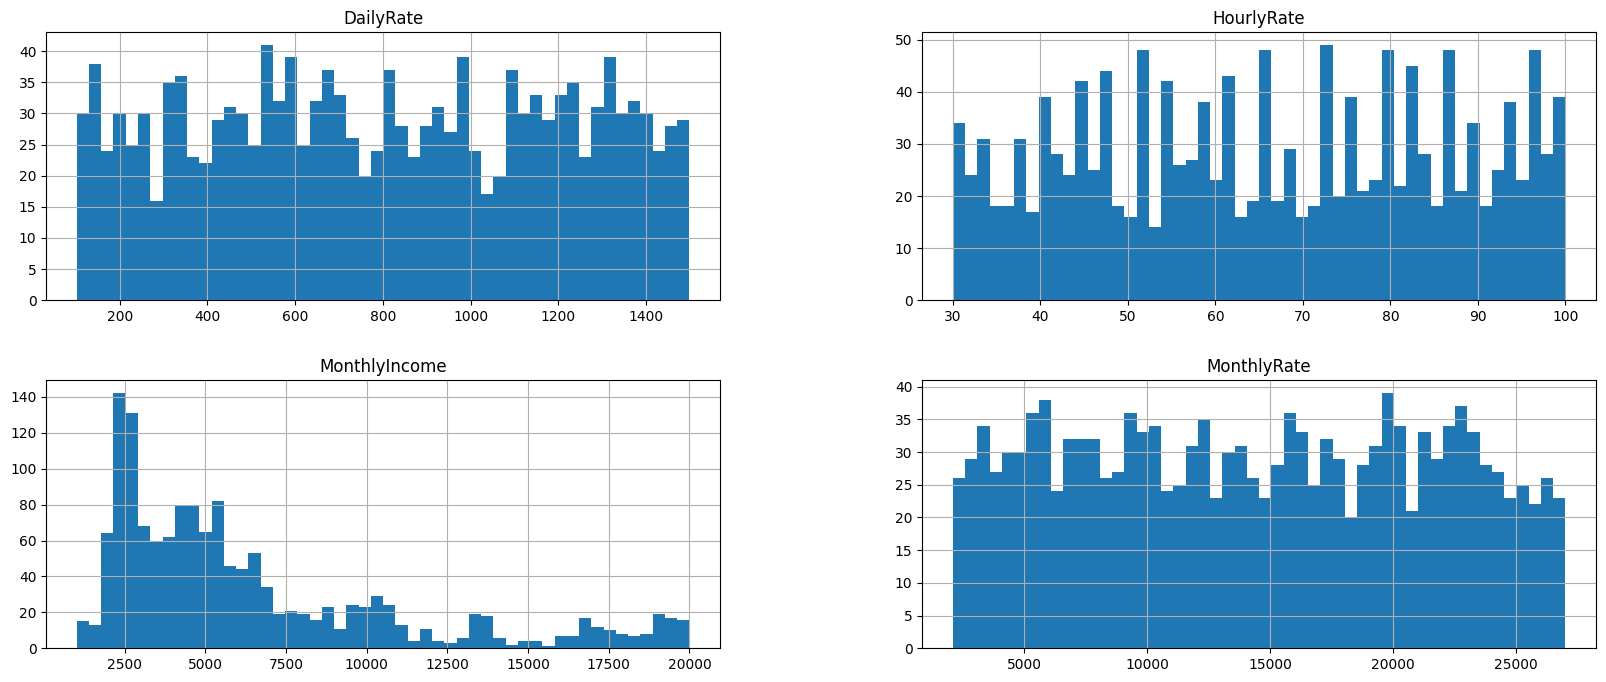

In [14]:
df1[['DailyRate', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate']].hist(bins=50,figsize=(20,8))
plt.show()

In [15]:
df1[['DailyRate', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate','StockOptionLevel']].corr()

,DailyRate,HourlyRate,MonthlyIncome,MonthlyRate,StockOptionLevel
DailyRate,1.000000,0.023381,0.007707,-0.032182,0.042143
HourlyRate,0.023381,1.000000,-0.015794,-0.015297,0.050263
MonthlyIncome,0.007707,-0.015794,1.000000,0.034814,0.005408
MonthlyRate,-0.032182,-0.015297,0.034814,1.000000,-0.034323
StockOptionLevel,0.042143,0.050263,0.005408,-0.034323,1.000000


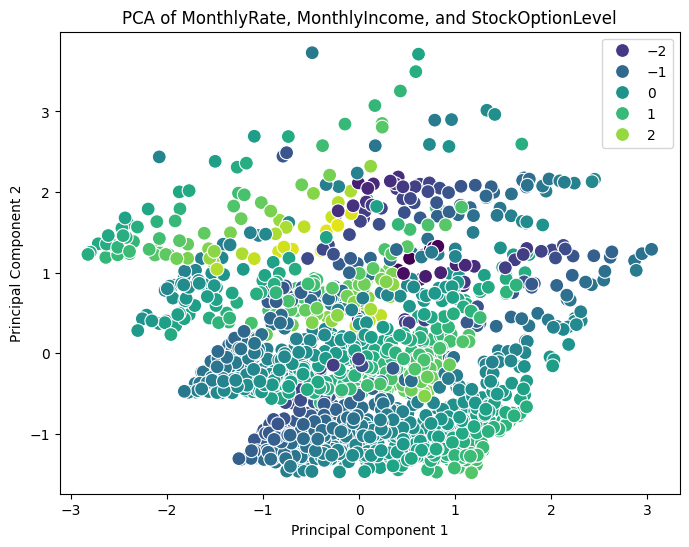

Explained Variance Ratio:
[0.3487531  0.33513571 0.3161112 ]


In [16]:
from sklearn.decomposition import PCA
features_of_interest = ['MonthlyRate', 'MonthlyIncome', 'StockOptionLevel']
X = df1[features_of_interest]

# Standardize the features
X_standardized = (X - X.mean()) / X.std()

# Fit PCA
pca = PCA(n_components=3)
pca.fit(X_standardized)

# Transform data to principal components
X_pca = pca.transform(X_standardized)

# Plotting the PCA components
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=X_pca[:, 2], palette='viridis', s=100)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of MonthlyRate, MonthlyIncome, and StockOptionLevel')
plt.legend()
plt.show()

# Explained variance ratio
print("Explained Variance Ratio:")
print(pca.explained_variance_ratio_)

#### No relation among Monthly Rate, Monthly income and Stock Option Level

In [17]:
# Find highly correlated features
threshold = 0.9
corr_pairs = df1[numeric_columns].corr().abs().unstack().sort_values(ascending=False)
high_corr_pairs = corr_pairs[(corr_pairs > threshold) & (corr_pairs < 1)]
print(high_corr_pairs)

JobLevel       MonthlyIncome    0.9503
MonthlyIncome  JobLevel         0.9503
dtype: float64


In [18]:
df1[['MonthlyIncome','JobLevel','Attrition']].corr()['Attrition']

MonthlyIncome   -0.159840
JobLevel        -0.169105
Attrition        1.000000
Name: Attrition, dtype: float64

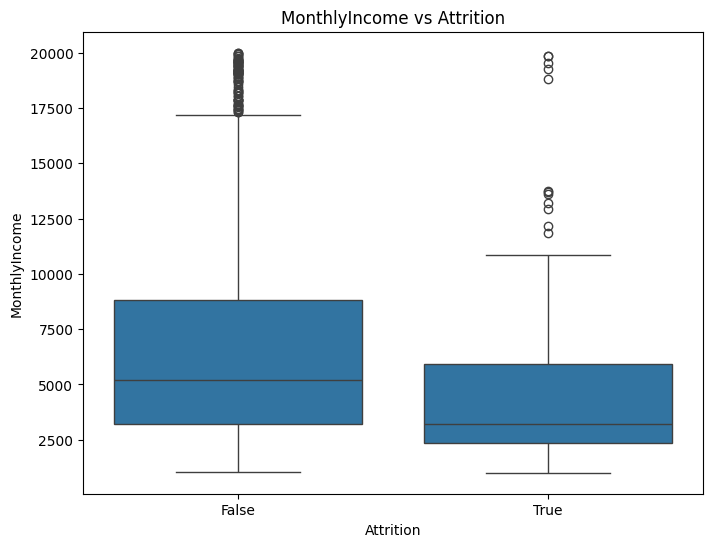

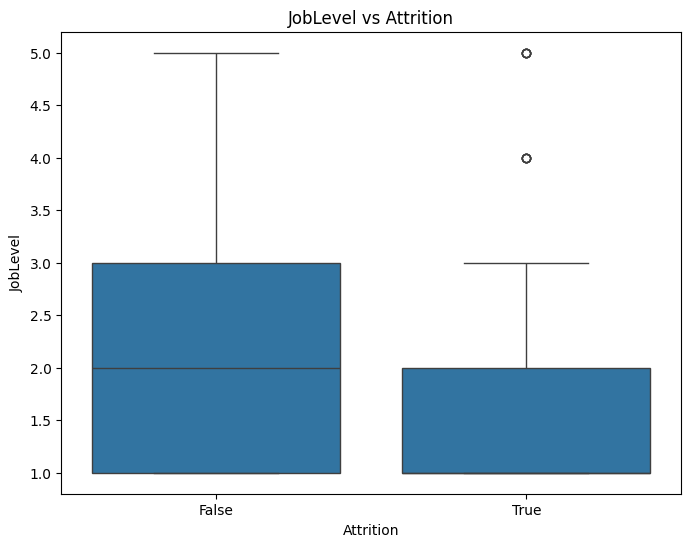

In [19]:
for col in ['MonthlyIncome','JobLevel']:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Attrition', y=col, data=df1)
    plt.title(f'{col} vs Attrition')
    plt.show()

### 'MonthlyIncome' is dropped
* It is highly correlated with Job Level 
* It is less correlated to Attrition (By Pearson Correlation coeff) 
* it contains lot of outliers as compared to Job Level

In [20]:
df1.drop(['MonthlyIncome'],inplace=True,axis=1)

In [21]:
numeric_columns,non_numeric_columns=column_list_seggregate(df1)

In [22]:
print(numeric_columns)

['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [23]:
df1[numeric_columns+['Attrition']].corr()['Attrition'].sort_values(key=abs)

PerformanceRating           0.002889
HourlyRate                 -0.006846
PercentSalaryHike          -0.013478
MonthlyRate                 0.015170
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
NumCompaniesWorked          0.043494
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
DistanceFromHome            0.077924
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
YearsAtCompany             -0.134392
StockOptionLevel           -0.137145
YearsWithCurrManager       -0.156199
Age                        -0.159205
YearsInCurrentRole         -0.160545
JobLevel                   -0.169105
TotalWorkingYears          -0.171063
Attrition                   1.000000
Name: Attrition, dtype: float64

In [24]:
len(numeric_columns)

22

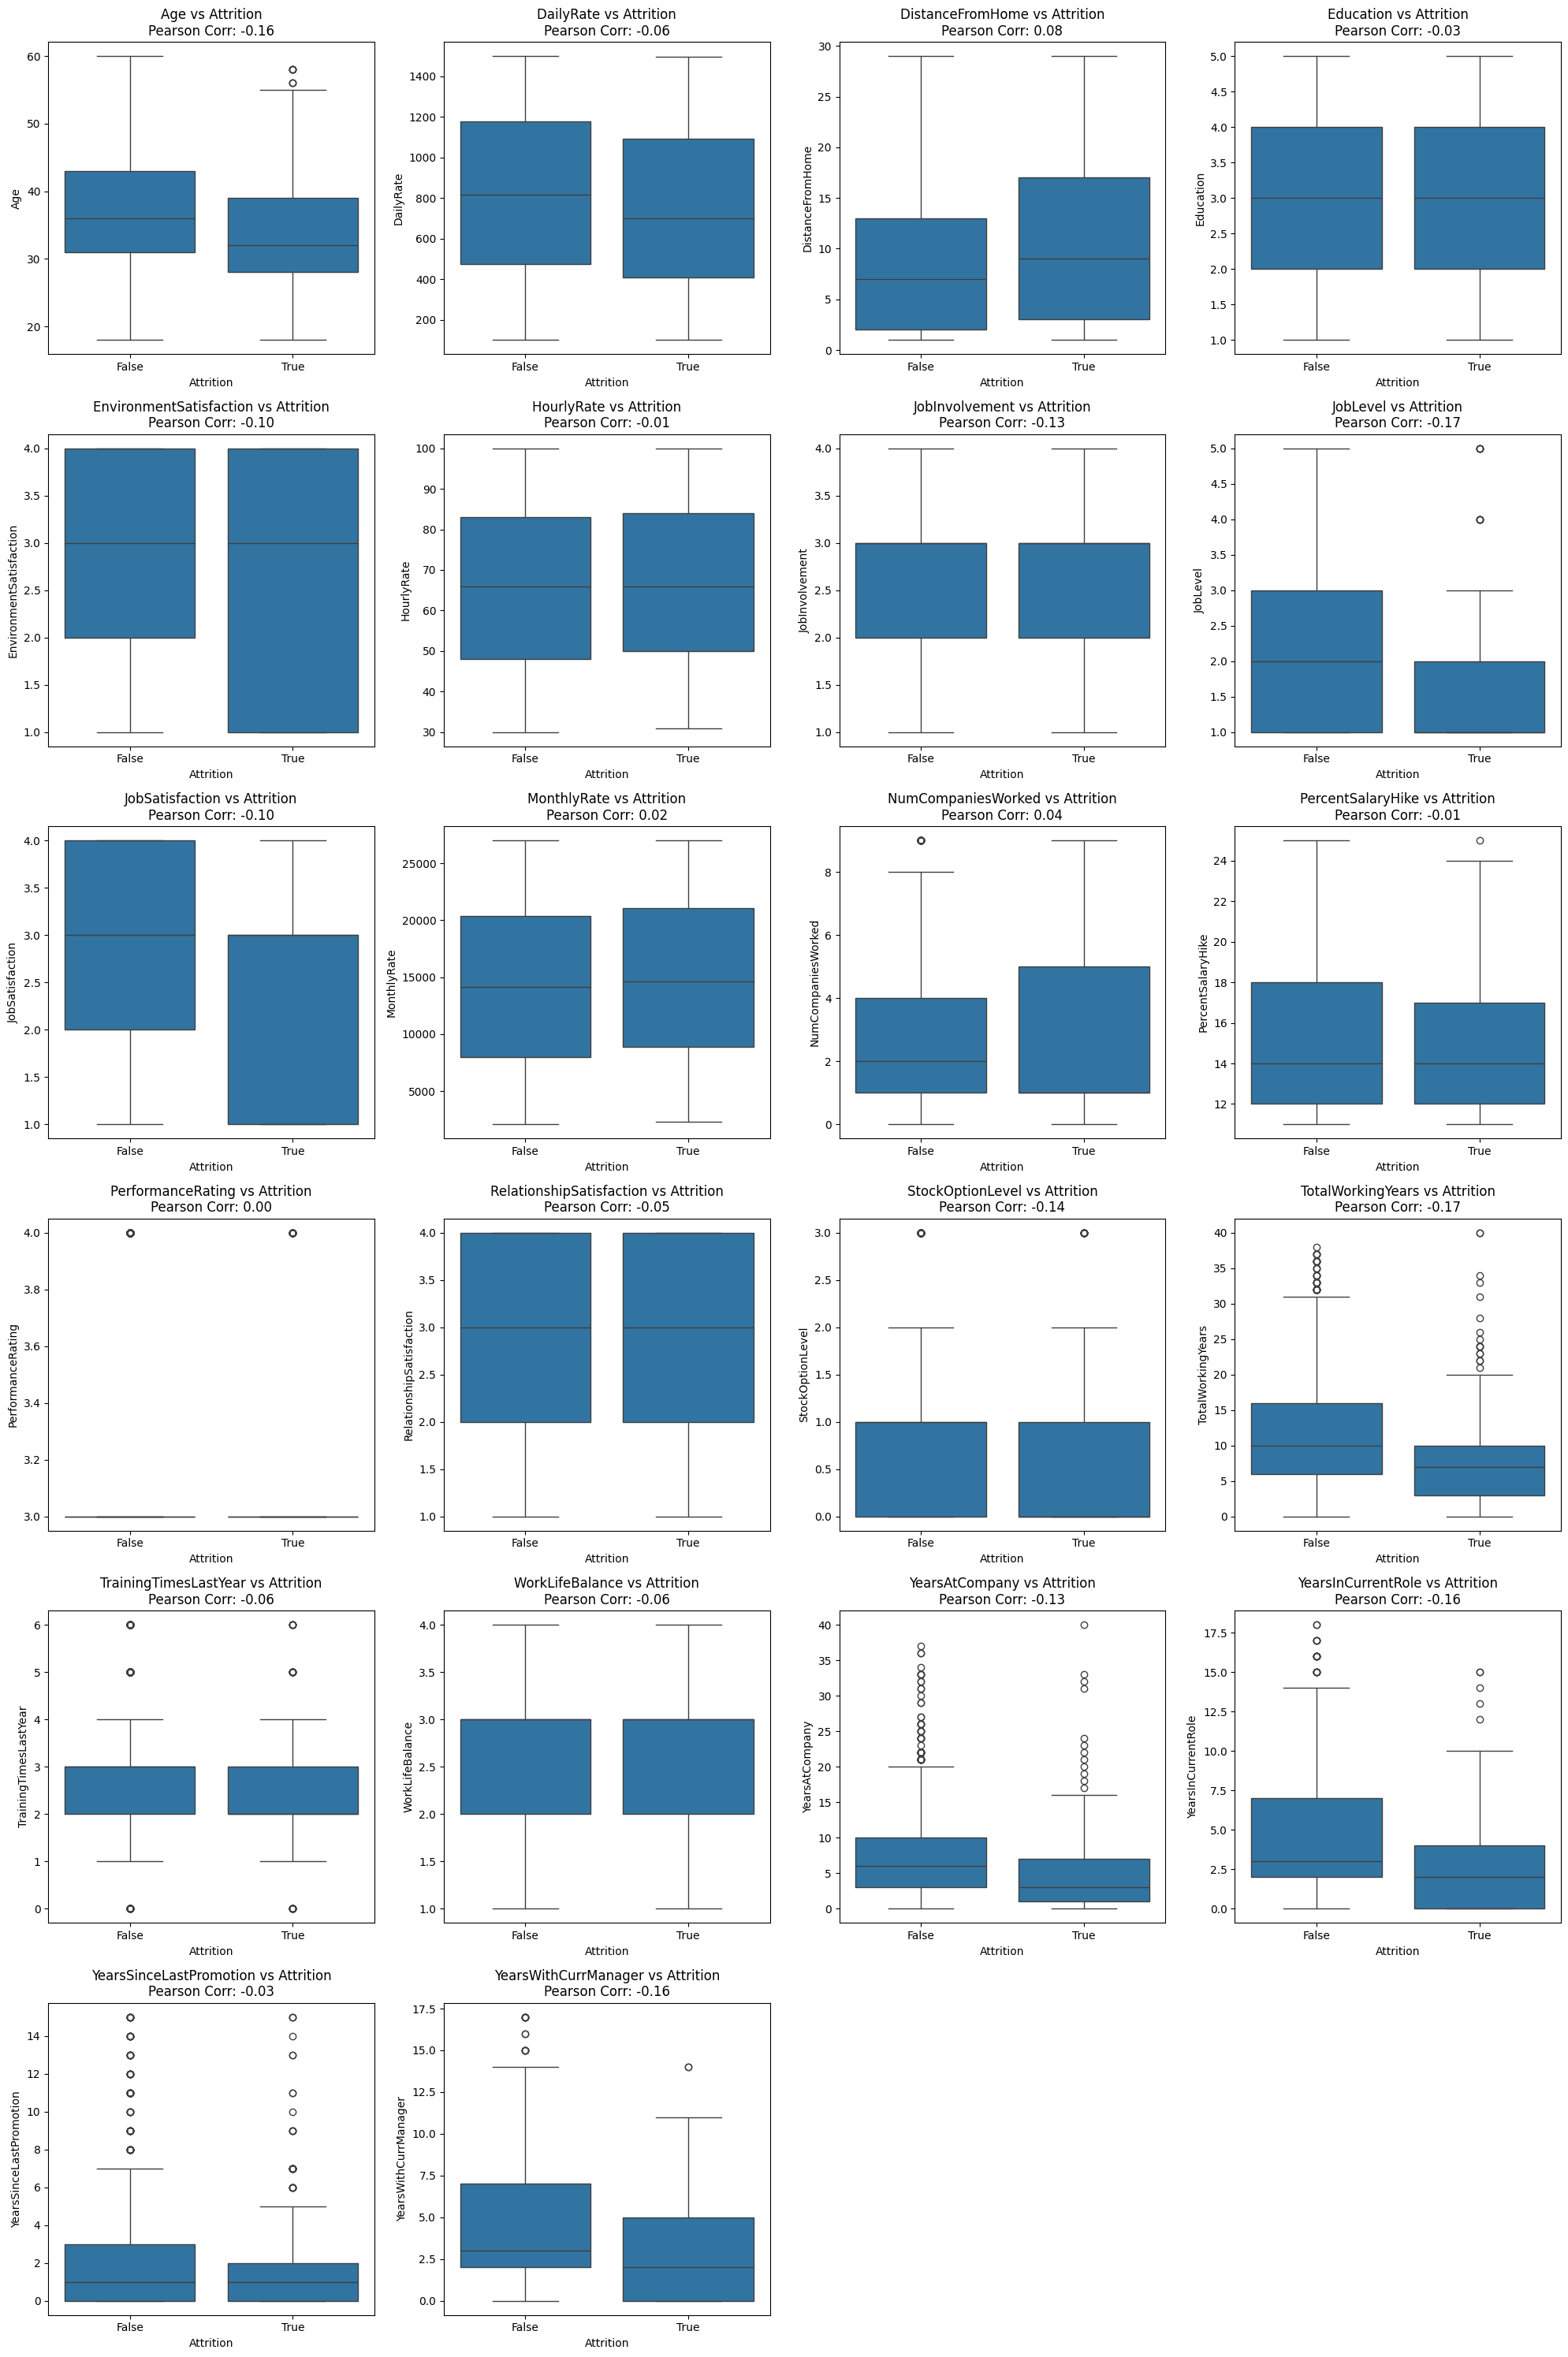

In [25]:
# Number of columns and rows for the grid
n_cols = 4
n_rows = 6

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 30))
axes = axes.flatten()

# Plot box plots
for i, col in enumerate(numeric_columns):
    sns.boxplot(x='Attrition', y=col, data=df1, ax=axes[i])
    axes[i].set_title(f'{col} vs Attrition\nPearson Corr: {df1[[col,"Attrition"]].corr().iloc[0,1]:.2f}')
    
# Remove any empty subplots if there are any
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [26]:
df1['PerformanceRating'].value_counts()

PerformanceRating
3    1244
4     226
Name: count, dtype: int64

#### Features to remove
* PerformanceRating,HourlyRate, MonthlyRate,Education,WorkLifeBalance,PercentSalaryHike,JobInvolvement,YearsSinceLastPromotion,EnvironmentSatisfaction,TrainingTimesLastYear,RelationshipSatisfaction,JobSatisfaction,YearsSinceLastPromotion,NumCompaniesWorked

In [27]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [28]:
# df1=df1.drop(columns=['Education', 'WorkLifeBalance', 'PerformanceRating', 'HourlyRate', 'PercentSalaryHike', 'JobInvolvement', 'YearsSinceLastPromotion', 
#                      'TrainingTimesLastYear', 'MonthlyRate','RelationshipSatisfaction','EnvironmentSatisfaction','JobSatisfaction','YearsSinceLastPromotion','NumCompaniesWorked'])
# df1=df1.drop(columns=['PerformanceRating', 'HourlyRate', 'MonthlyRate','RelationshipSatisfaction','EnvironmentSatisfaction','JobSatisfaction','YearsSinceLastPromotion','NumCompaniesWorked'])

In [29]:
numeric_columns,non_numeric_columns=column_list_seggregate(df1)

In [30]:
non_numeric_columns.remove('Attrition')

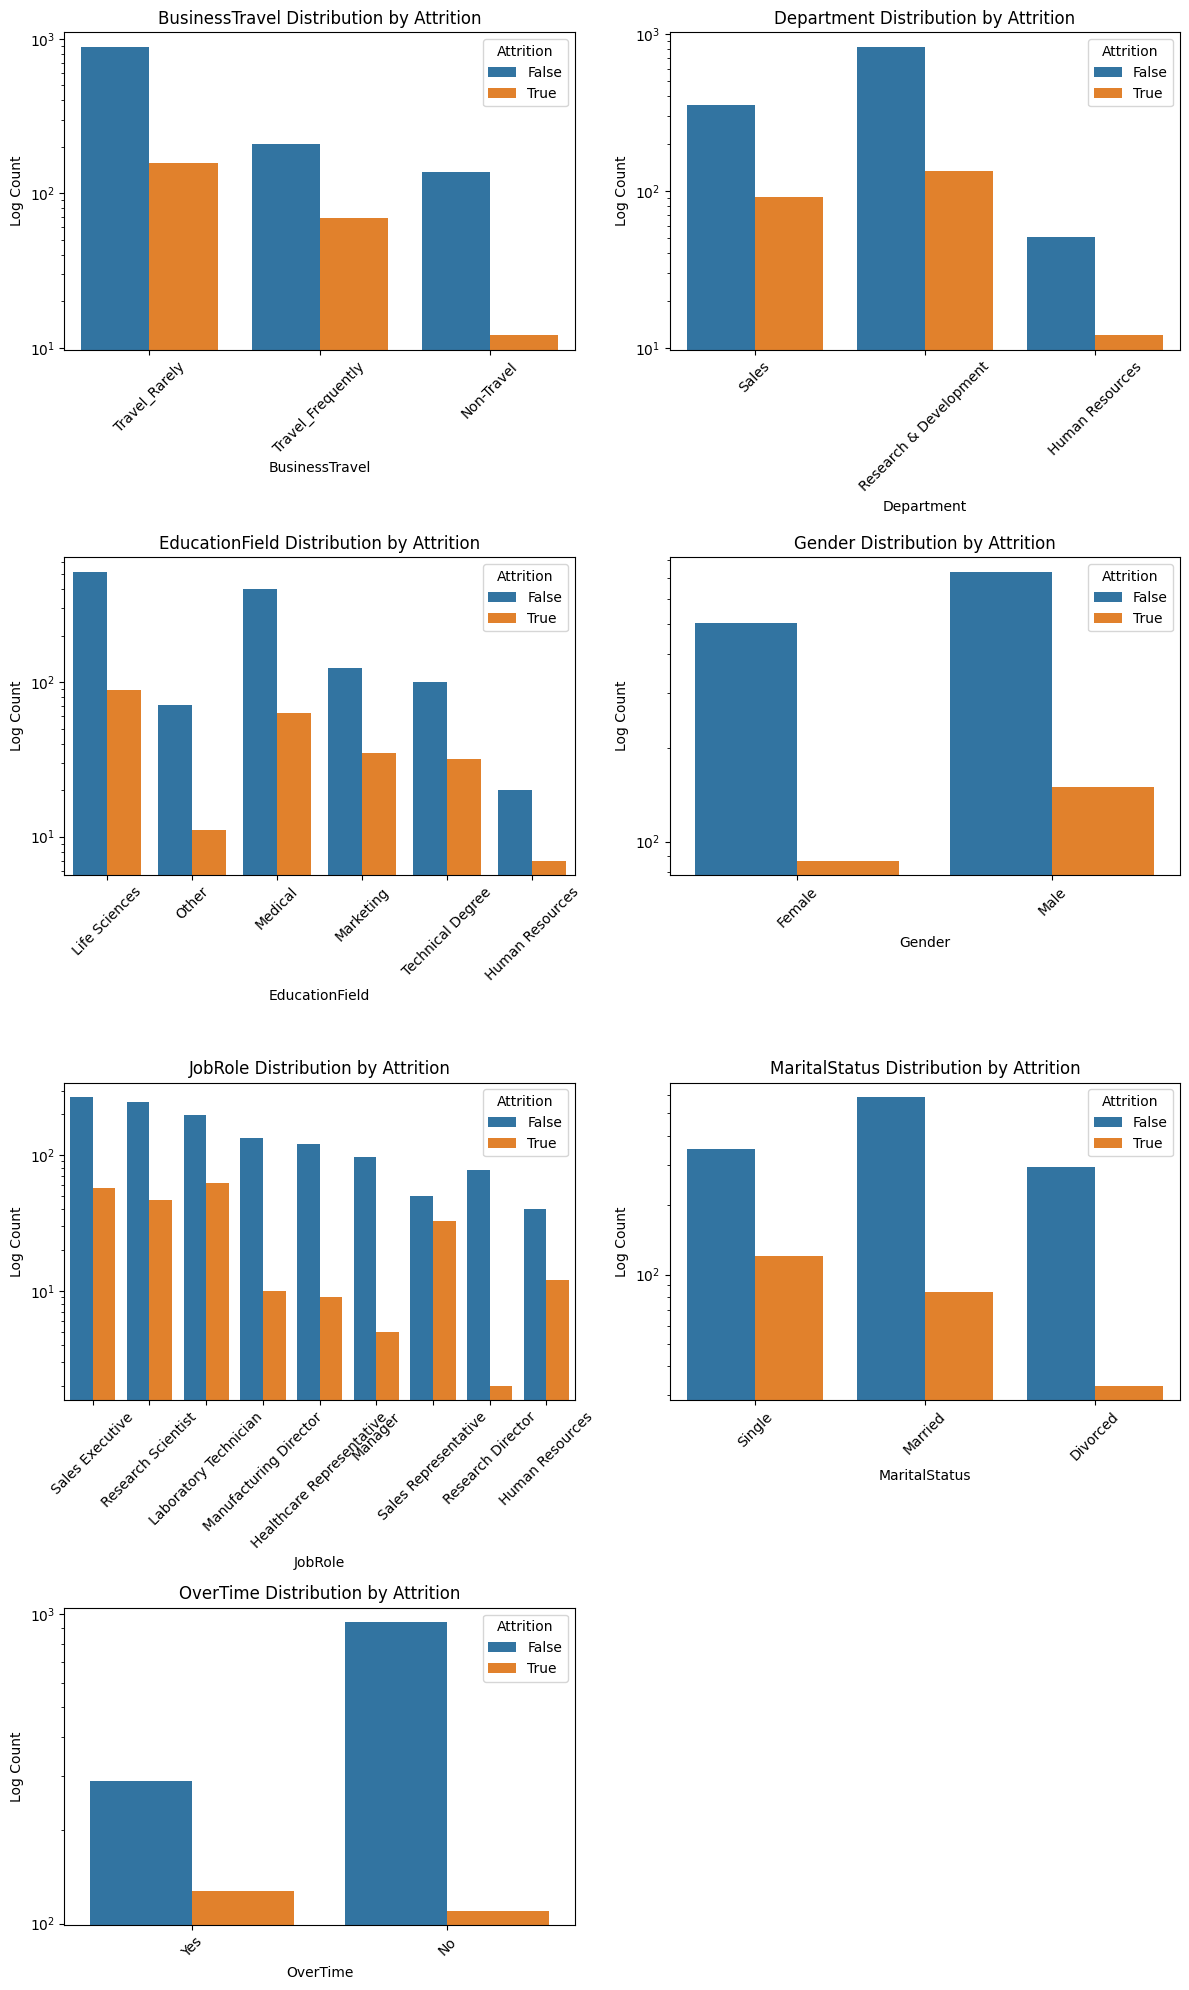

In [31]:
# Using Log scale since Attrition is unbalanced
plt.figure(figsize=(12, 20))
for i, col in enumerate(non_numeric_columns, 1):
    plt.subplot(4, 2, i)
    sns.countplot(x=col, hue='Attrition', data=df1)
    plt.yscale('log')  # Use logarithmic scale on y-axis
    plt.title(f'{col} Distribution by Attrition')
    plt.xlabel(col)
    plt.ylabel('Log Count')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Feature Encoding

In [32]:
for col in non_numeric_columns:
    unique_values_str = ', '.join(map(str, df1[col].unique()))
    print(f'Unique values {col.ljust(20)}:{df1[col].nunique()} -> ({(unique_values_str).center(20)})')

Unique values BusinessTravel      :3 -> (Travel_Rarely, Travel_Frequently, Non-Travel)
Unique values Department          :3 -> (Sales, Research & Development, Human Resources)
Unique values EducationField      :6 -> (Life Sciences, Other, Medical, Marketing, Technical Degree, Human Resources)
Unique values Gender              :2 -> (    Female, Male    )
Unique values JobRole             :9 -> (Sales Executive, Research Scientist, Laboratory Technician, Manufacturing Director, Healthcare Representative, Manager, Sales Representative, Research Director, Human Resources)
Unique values MaritalStatus       :3 -> (Single, Married, Divorced)
Unique values OverTime            :2 -> (      Yes, No       )


In [33]:
# Concatenate original DataFrame with dummy variables
df1 = pd.concat([df1, pd.get_dummies(df1[['Gender', 'OverTime']], drop_first=True)], axis=1)
# Drop original categorical columns if needed
df1.drop(['Gender','OverTime'], axis=1,inplace=True)

In [34]:
numeric_columns,non_numeric_columns=column_list_seggregate(df1)
df1[non_numeric_columns].head()

,Attrition,BusinessTravel,Department,EducationField,JobRole,MaritalStatus,Gender_Male,OverTime_Yes
0,True,Travel_Rarely,Sales,Life Sciences,Sales Executive,Single,False,True
1,False,Travel_Frequently,Research & Development,Life Sciences,Research Scientist,Married,True,False
2,True,Travel_Rarely,Research & Development,Other,Laboratory Technician,Single,True,True
3,False,Travel_Frequently,Research & Development,Life Sciences,Research Scientist,Married,False,True
4,False,Travel_Rarely,Research & Development,Medical,Laboratory Technician,Married,True,False


In [35]:
# Concatenate original DataFrame with dummy variables
df1 = pd.concat([df1, pd.get_dummies(df1[['BusinessTravel', 'Department','EducationField','JobRole','MaritalStatus']], drop_first=False)], axis=1)
# Drop original categorical columns if needed
df1.drop(['BusinessTravel', 'Department','EducationField','JobRole','MaritalStatus'], axis=1,inplace=True)

In [36]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 49 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   Attrition                          1470 non-null   bool 
 2   DailyRate                          1470 non-null   int64
 3   DistanceFromHome                   1470 non-null   int64
 4   Education                          1470 non-null   int64
 5   EnvironmentSatisfaction            1470 non-null   int64
 6   HourlyRate                         1470 non-null   int64
 7   JobInvolvement                     1470 non-null   int64
 8   JobLevel                           1470 non-null   int64
 9   JobSatisfaction                    1470 non-null   int64
 10  MonthlyRate                        1470 non-null   int64
 11  NumCompaniesWorked                 1470 non-null   int64
 12  PercentSalaryHike   

In [37]:
df1.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Gender_Male,OverTime_Yes,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,True,1102,1,2,2,94,3,2,4,19479,8,11,3,1,0,8,0,1,6,4,0,5,False,True,False,False,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True
1,49,False,279,8,1,3,61,2,2,2,24907,1,23,4,4,1,10,3,3,10,7,1,7,True,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False
2,37,True,1373,2,2,4,92,2,1,3,2396,6,15,3,2,0,7,3,3,0,0,0,0,True,True,False,False,True,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True
3,33,False,1392,3,4,4,56,3,1,3,23159,1,11,3,3,0,8,3,3,8,7,3,0,False,True,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False
4,27,False,591,2,1,1,40,3,1,2,16632,9,12,3,4,1,6,3,3,2,2,2,2,True,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False


In [38]:
df1.columns

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Gender_Male',
       'OverTime_Yes', 'BusinessTravel_Non-Travel',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Human Resources',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'JobRole_Healthcare Representative',
       'JobRole_Human Resources'

<Axes: >

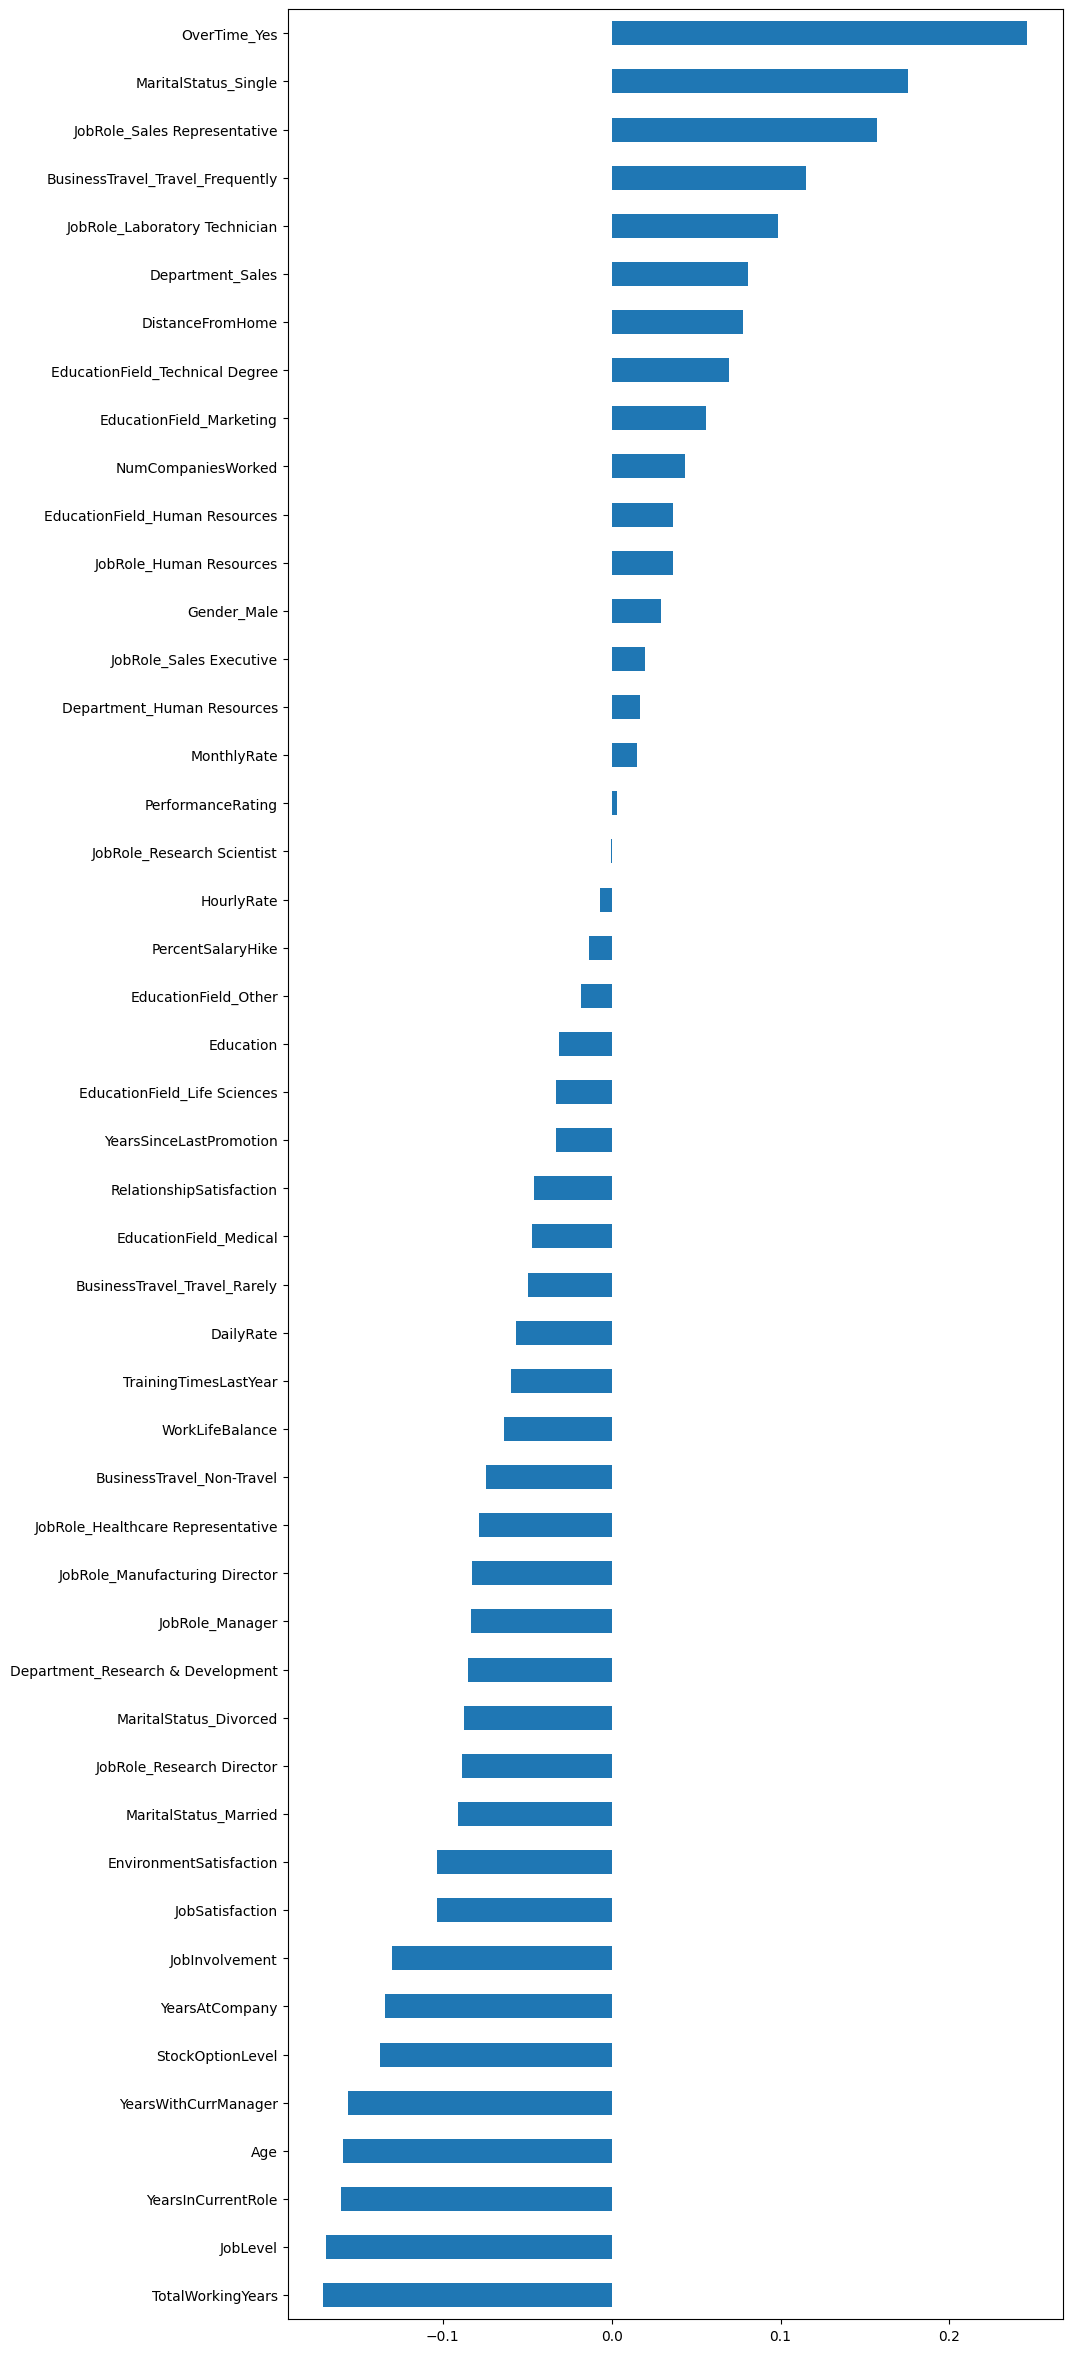

In [39]:
df1.drop('Attrition', axis=1).corrwith(df1.Attrition).sort_values().plot(kind='barh', figsize=(10, 30))

In [40]:
# Split the data
X = df1.drop('Attrition', axis=1)
y = df1['Attrition']

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
y.value_counts()

Attrition
False    1233
True      237
Name: count, dtype: int64

### Attrition Dataset is unbalanced

In [62]:
stay = (y_train.value_counts()[0] / y_train.shape)[0]
leave = (y_train.value_counts()[1] / y_train.shape)[0]

print("===============TRAIN=================")
print(f"Staying Rate: {stay * 100:.2f}%")
print(f"Leaving Rate: {leave * 100 :.2f}%")

stay = (y_test.value_counts()[0] / y_test.shape)[0]
leave = (y_test.value_counts()[1] / y_test.shape)[0]

print("===============TEST=================")
print(f"Staying Rate: {stay * 100:.2f}%")
print(f"Leaving Rate: {leave * 100 :.2f}%")

===============TRAIN=================
Staying Rate: 83.16%
Leaving Rate: 16.84%
===============TEST=================
Staying Rate: 86.73%
Leaving Rate: 13.27%


In [63]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Define the model
rf = RandomForestClassifier(random_state=42)

# Train the model
rf.fit(X_train_res, y_train_res)

# Evaluate the model
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.90      0.97      0.94       255
        True       0.63      0.31      0.41        39

    accuracy                           0.88       294
   macro avg       0.77      0.64      0.67       294
weighted avg       0.87      0.88      0.87       294

ROC AUC Score: 0.6401206636500754
